In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from keras.datasets import imdb,fashion_mnist

# Veri Ön İşleme

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## Test ve Train Shape'lerini öğrenmek

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_test.shape

(10000,)

## 5 tane rastele veri göselleştirmek

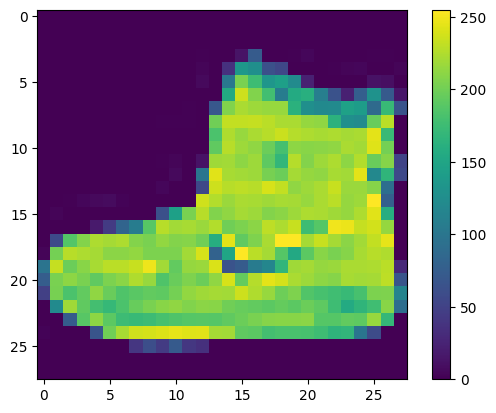

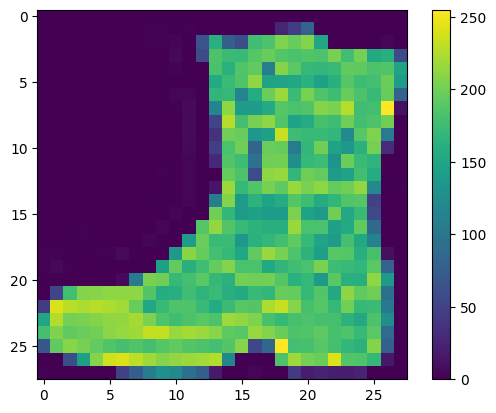

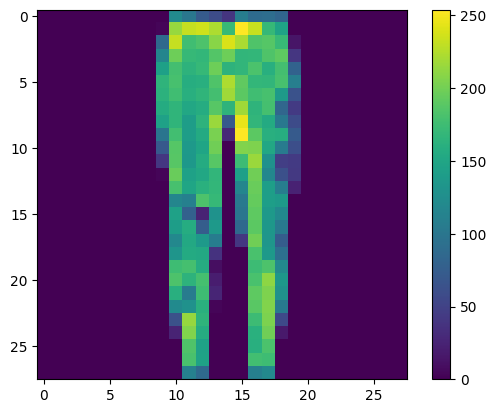

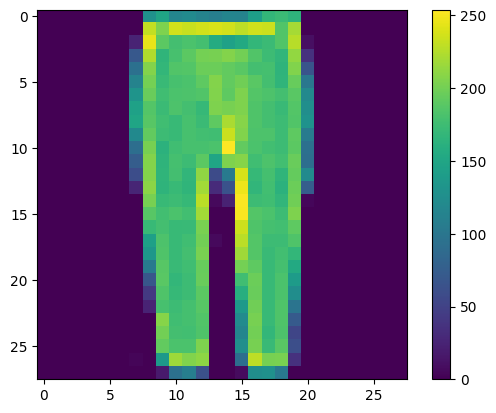

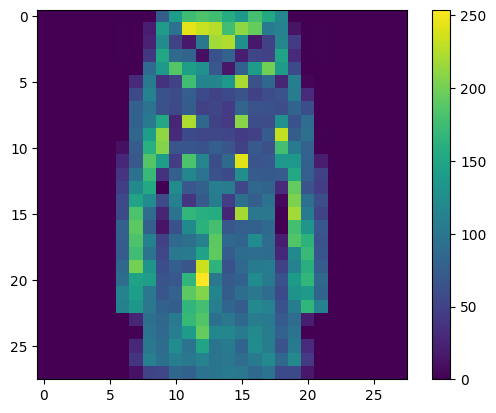

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(X_train[150])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(X_train[78])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(X_train[98])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(X_train[656])
plt.colorbar()
plt.grid(False)
plt.show()

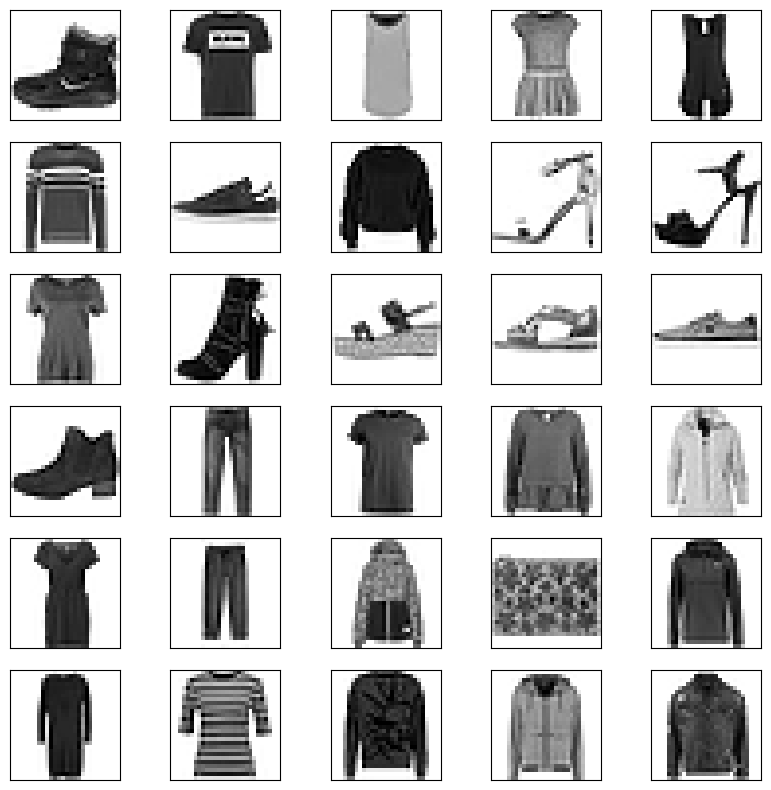

In [ ]:
##Toplu göselleştirelim
plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

## Verileri Normalize edelim


In [ ]:
X_train = X_train / 255.0

X_test = X_test / 255.0

# Model Oluşturup Eğitin

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
knn=KNeighborsClassifier().fit(X_train,y_train)

In [ ]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
acc

0.8554

In [ ]:
f1

0.8546439722018904

In [ ]:
recall

0.8554

In [ ]:
precision

0.8578152450755355

In [ ]:
#karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[855,   1,  17,  16,   3,   1, 100,   1,   6,   0],
       [  8, 968,   4,  12,   4,   0,   3,   0,   1,   0],
       [ 24,   2, 819,  11,  75,   0,  69,   0,   0,   0],
       [ 41,   8,  15, 860,  39,   0,  34,   0,   3,   0],
       [  2,   1, 126,  26, 773,   0,  71,   0,   1,   0],
       [  1,   0,   0,   0,   0, 822,   5,  96,   1,  75],
       [176,   1, 132,  23,  80,   0, 575,   0,  13,   0],
       [  0,   0,   0,   0,   0,   3,   0, 961,   0,  36],
       [  2,   0,  10,   4,   7,   0,  16,   7, 953,   1],
       [  0,   0,   0,   0,   0,   2,   1,  29,   0, 968]])

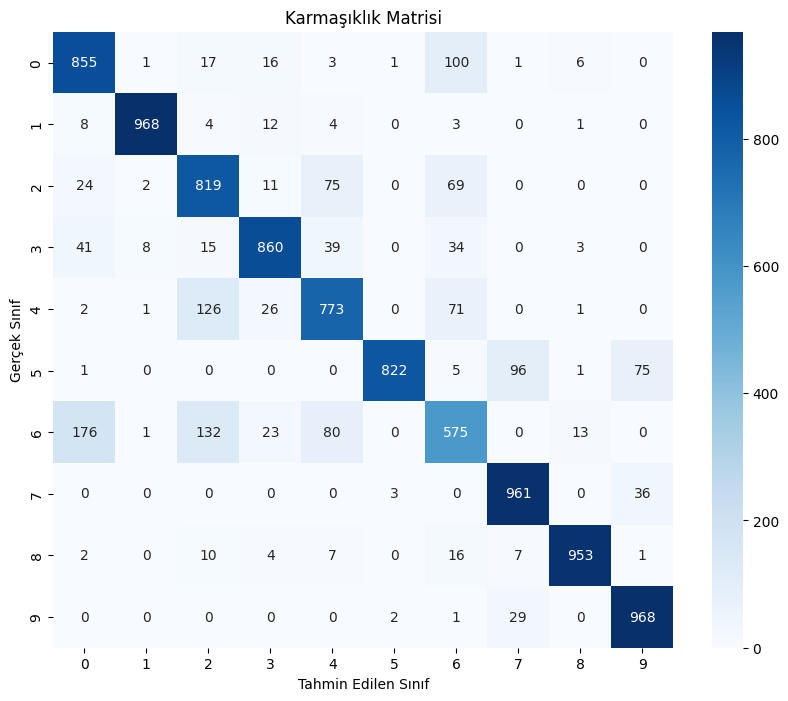

In [ ]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
#Rastgele orman (Random Forrest) oluşturma

In [ ]:
rf=RandomForestClassifier().fit(X_train,y_train)

In [ ]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.8554
F1 Skoru: 0.8546
Geri Çağırma (Recall): 0.8554
Kesinlik (Precision): 0.8578


In [ ]:

cm = confusion_matrix(y_test, y_pred)
cm


array([[855,   1,  17,  16,   3,   1, 100,   1,   6,   0],
       [  8, 968,   4,  12,   4,   0,   3,   0,   1,   0],
       [ 24,   2, 819,  11,  75,   0,  69,   0,   0,   0],
       [ 41,   8,  15, 860,  39,   0,  34,   0,   3,   0],
       [  2,   1, 126,  26, 773,   0,  71,   0,   1,   0],
       [  1,   0,   0,   0,   0, 822,   5,  96,   1,  75],
       [176,   1, 132,  23,  80,   0, 575,   0,  13,   0],
       [  0,   0,   0,   0,   0,   3,   0, 961,   0,  36],
       [  2,   0,  10,   4,   7,   0,  16,   7, 953,   1],
       [  0,   0,   0,   0,   0,   2,   1,  29,   0, 968]])

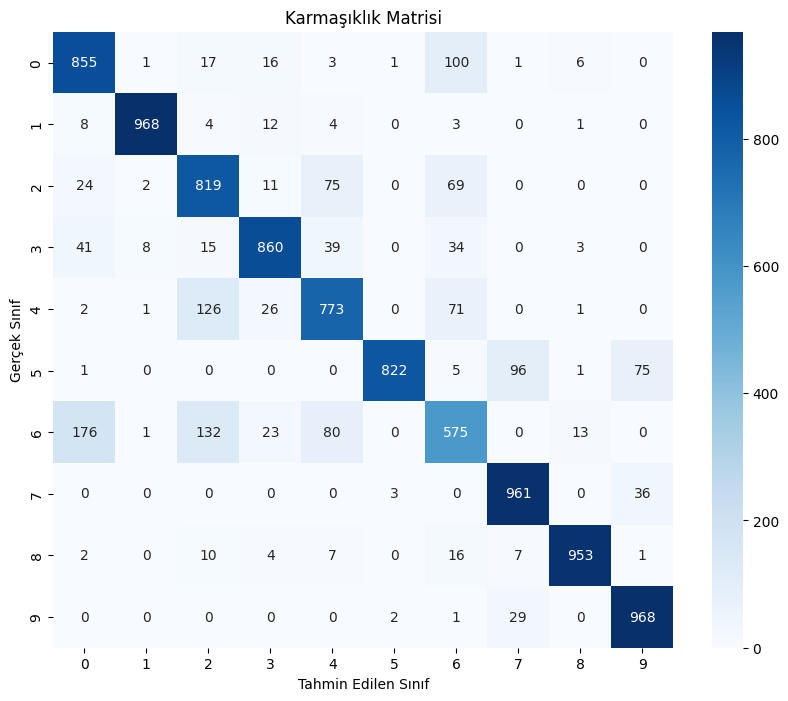

In [ ]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
# Karar Ağacı oluştur

In [ ]:
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
y_pred=dt.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.7892
F1 Skoru: 0.7899
Geri Çağırma (Recall): 0.7892
Kesinlik (Precision): 0.7909
